LAB 05 26/09/2024

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

    Image filtering

    Convolution

Ex. 2.1 Change the kernel used in the previous example and analyze the results. Try to use a kernel without normalizing the values by the number of elements in the kernel. How is this altering the output image brightness level compared to the input image?

(np.float64(-0.5), np.float64(688.5), np.float64(944.5), np.float64(-0.5))

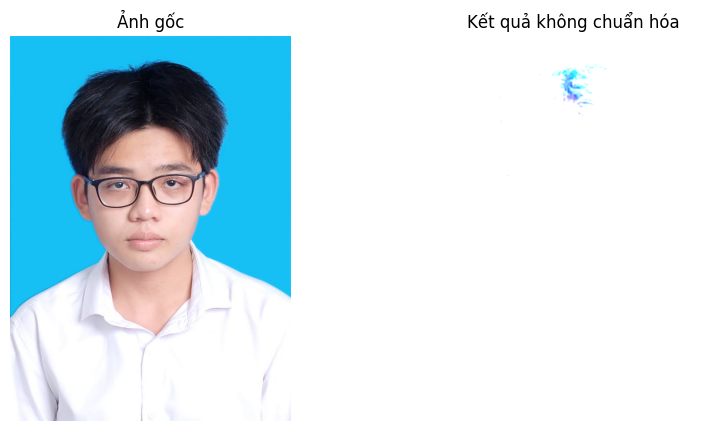

In [8]:
# Đọc ảnh
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\image.jpg'
image = plt.imread(image_path)
if image is None:
    print("Hình ảnh không đọc được. Vui lòng kiểm tra lại đường dẫn.")

# Tạo kernel không chuẩn hóa
kernel = np.ones((5, 5), dtype=np.float32)

# Áp dụng convolution
result = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image)
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(122)
plt.imshow(result)
plt.title("Kết quả không chuẩn hóa")
plt.axis('off')

Nhận xét:

Kernel không chuẩn hóa làm ảnh sáng hơn vì tổng các giá trị trong kernel lớn hơn 1.

Kernel chuẩn hóa giữ nguyên độ sáng của ảnh.

Ex. 2.2 Modify the previous example by testing the following kernels on the input images “white_square.jpg” and “hop.jpg”. 

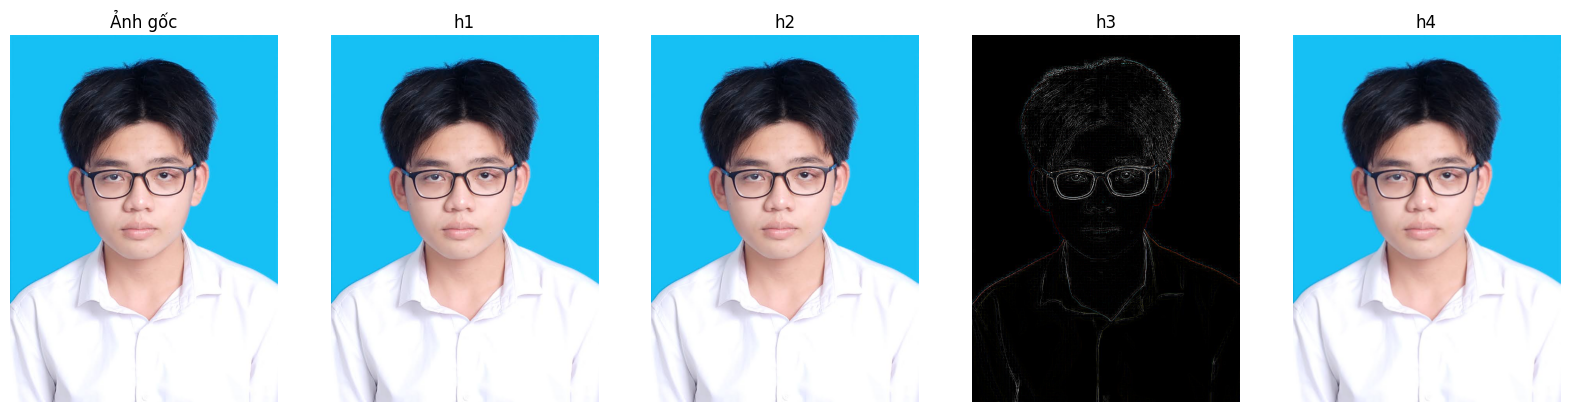

In [11]:
h1 = np.array([[0, 0, 0],
               [0, 1, 0],
               [0, 0, 0]])

h2 = np.array([[0, 0, 0],
               [0, 0, 0],
               [0, 0, 1]])

h3 = np.array([[-1, -1, -1],
               [-1,  8, -1],
               [-1, -1, -1]])

h4 = (1 / 16) * np.array([[1, 2, 1],
                          [2, 4, 2],
                          [1, 2, 1]])

# Đọc ảnh
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\image.jpg'
image = plt.imread(image_path)
if image is None:
    print("Hình ảnh không đọc được. Vui lòng kiểm tra lại đường dẫn.")

kernels = {"h1": h1, "h2": h2, "h3": h3, "h4": h4}

plt.figure(figsize=(20, 10))
plt.subplot(151)
plt.imshow(image)
plt.title("Ảnh gốc")
plt.axis('off')

for i, (name, kernel) in enumerate(kernels.items(), start=2):
    result = cv2.filter2D(image, -1, kernel)
    plt.subplot(1, 5, i)
    plt.imshow(result)
    plt.title(name)
    plt.axis('off')
plt.show()

Nhận xét:

h1: Không thay đổi ảnh.

h2: Dịch chuyển giá trị pixel.

h3: Phát hiện cạnh.

h4: Làm mờ ảnh.

    Box blur

Ex. 2.3 Describe both smoothing operations in view of the final results: How much smoother appears the logo background? How are the contours changing with the blurring kernel?

(np.float64(-0.5), np.float64(688.5), np.float64(944.5), np.float64(-0.5))

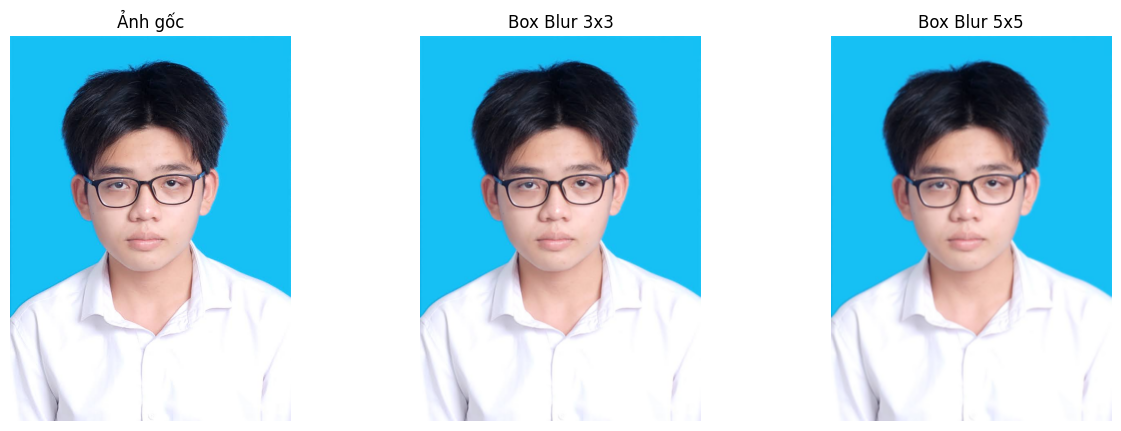

In [19]:
# Box Blur với các kernel khác nhau
blur_3x3 = cv2.blur(image, (3, 3))
blur_5x5 = cv2.blur(image, (5, 5))

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(image)
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(132)
plt.imshow(blur_3x3)
plt.title("Box Blur 3x3")
plt.axis('off')

plt.subplot(133)
plt.imshow(blur_5x5)
plt.title("Box Blur 5x5")
plt.axis('off')


Nhận xét:

Kernel lớn hơn (5x5) làm mờ tốt hơn nhưng làm mất chi tiết viền.

    Gaussian filtering in OpenCV

Ex. 2.4 Add the missing lines of code, indicated by the comments. Describe both smoothing operations comparing the final images: how much smoother appears the logo background? How are the 
contours in the image changing with the blurring kernel? Try Gaussian filtering for the test images “logo_noise2.jpg” and “lina_noise.jpg” and identify the best kernel size.

(np.float64(-0.5), np.float64(688.5), np.float64(944.5), np.float64(-0.5))

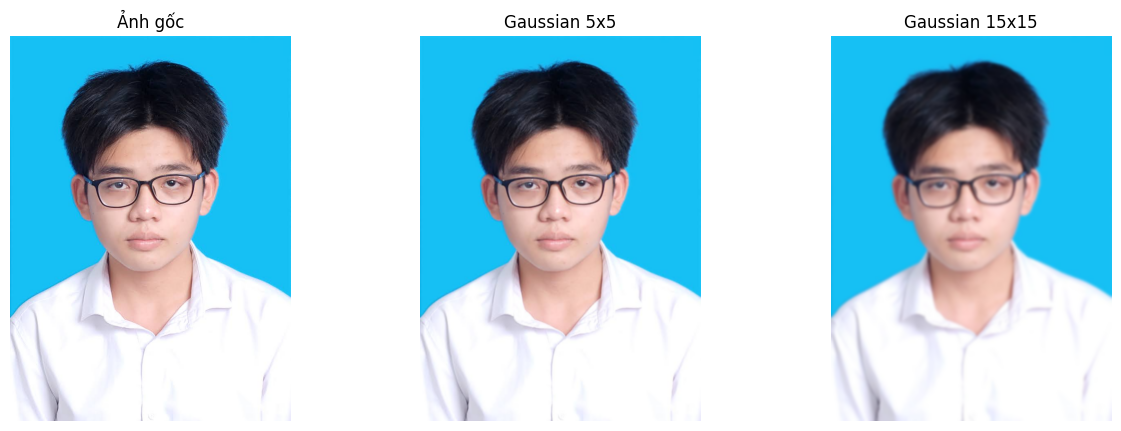

In [20]:
# Gaussian Blur với các kernel khác nhau
gaussian_5x5 = cv2.GaussianBlur(image, (5, 5), 0)
gaussian_15x15 = cv2.GaussianBlur(image, (15, 15), 3)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(image)
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(132)
plt.imshow(gaussian_5x5)
plt.title("Gaussian 5x5")
plt.axis('off')

plt.subplot(133)
plt.imshow(gaussian_15x15)
plt.title("Gaussian 15x15")
plt.axis('off')

Nhận xét:

Gaussian Blur làm mờ mịn hơn Box Blur.

Kernel lớn hơn (15x15) làm mờ nhiều hơn nhưng làm mất chi tiết.

    Median filter 

Ex. 2.5  Add the missing lines of code, indicated by the comments. What type of texture is affected the most by the salt-and-pepper noise? Which smoothing filter performs better on the edges? In order to preserve the edges, is it better to use a larger kernel or a smaller one? Which removes the noise most efficiently? Try experimenting with other kernel sizes as well! 

(np.float64(-0.5), np.float64(688.5), np.float64(944.5), np.float64(-0.5))

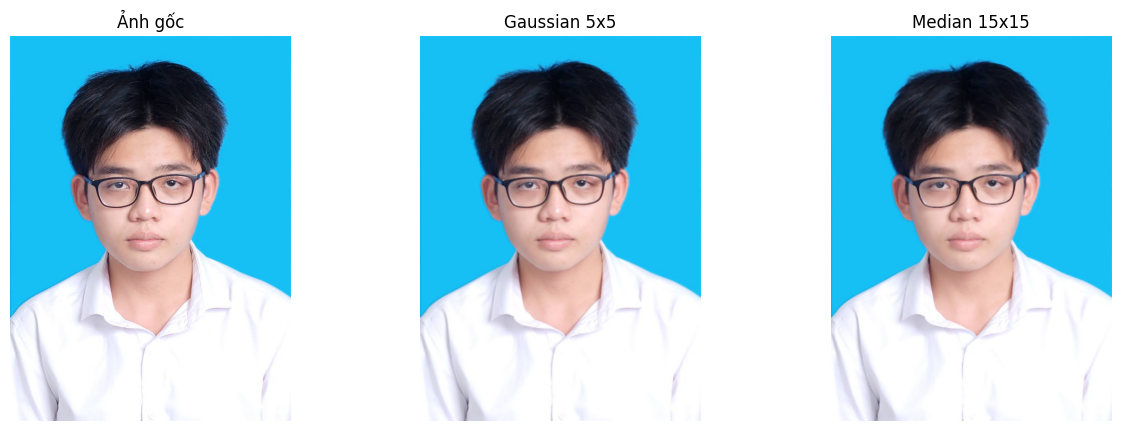

In [21]:
# Áp dụng Gaussian Blur (kernel 5x5)
gaussian_5x5 = cv2.GaussianBlur(image, (5, 5), 0)

# Áp dụng Median Blur (kernel 5x5)
median_5x5 = cv2.medianBlur(image, 5)

# Hiển thị kết quả
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(image)
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(132)
plt.imshow(gaussian_5x5)
plt.title("Gaussian 5x5")
plt.axis('off')

plt.subplot(133)
plt.imshow(median_5x5)
plt.title("Median 15x15")
plt.axis('off')

Nhận xét:

Median Blur: Loại bỏ nhiễu salt-and-pepper tốt hơn so với Gaussian Blur vì nó thay giá trị pixel trung tâm bằng trung vị của các pixel xung quanh.

Gaussian Blur: Làm mờ mịn hơn nhưng không loại bỏ nhiễu hiệu quả như Median Blur.

    Bilateral filter

Ex. 2.6  Add the missing lines of code, indicated by the comments. Read multiple images affected by different types of noise: salt-and-pepper noise is present in “logo_noise.jpg” and 
“lina_noise.jpg”, while gaussian noise is present in “logo_noise2.jpg”. Experiment with different values of kernel size and sigma and establish which type of filtering: median or bilateral is best in each case, depending on the noise type. Show the comparison results and comment on the best choice of parameters for each filter.  

(np.float64(-0.5), np.float64(688.5), np.float64(944.5), np.float64(-0.5))

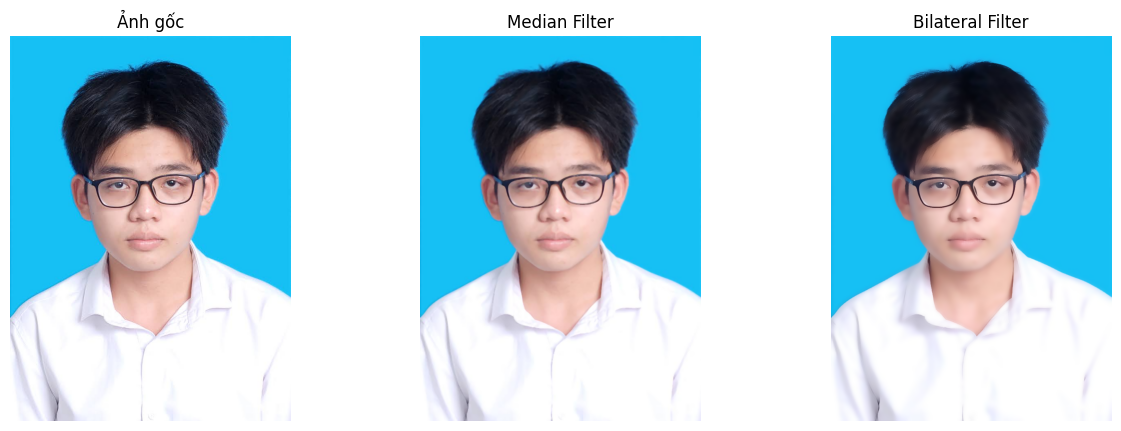

In [24]:
# Median Filter (kernel size 5)
median_5x5 = cv2.medianBlur(image, 5)

# Bilateral Filter
dia = 15
sigma_color = 80
sigma_space = 80
bilateral = cv2.bilateralFilter(image, dia, sigma_color, sigma_space)

# Hiển thị kết quả
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(image)
plt.title("Ảnh gốc")
plt.axis('off')

plt.subplot(132)
plt.imshow(median_5x5)
plt.title("Median Filter")
plt.axis('off')

plt.subplot(133)
plt.imshow(bilateral)
plt.title("Bilateral Filter")
plt.axis('off')


Nhận xét:

Median Filter: Hiệu quả nhất với nhiễu salt-and-pepper, nhưng có thể làm mờ các cạnh.

Bilateral Filter: Hiệu quả hơn với nhiễu Gaussian (giữ được chi tiết ở cạnh).

    Tổng kết về lựa chọn bộ lọc

Nhiễu salt-and-pepper -	Median Filter -	Loại bỏ nhiễu điểm cao thấp đột ngột hiệu quả nhất.

Nhiễu Gaussian mức cao - Bilateral Filter -	Làm mờ nhưng giữ chi tiết ở các cạnh.

Nhiễu Gaussian mức thấp	- Gaussian Blur	- Nhanh hơn và làm mờ tốt với mức nhiễu thấp.